In [138]:
# Importing the Required library descibtive statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')

#imporitng the preprocessing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.decomposition import PCA

#importing the meachine learning models
from sklearn.ensemble import RandomForestClassifier

#importing the library for algorithm measures
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

#to make the graphs and plots embedded in the notebook
%matplotlib inline

In [36]:
#Importing the dataset form the kaggle(placed in github)
Dataset = pd.read_csv('https://raw.githubusercontent.com/Tejasmallikarjuncj/Cancer_prediction/main/data.csv')
Dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
#Replacing the M to 0 and B to 1 form classification
Dataset.replace('M',0,inplace=True)
Dataset.replace('B',1,inplace=True)
Dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
#removing umwanted features columns
#Dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)
Dataset.dtype = float
Dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# describing and visualization the data set

In [50]:
#describing
print("The size of the dataset is :",Dataset.shape)
Dataset.describe()

The size of the dataset is : (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#visualizing the dataset
features = Dataset.iloc[:,1:32].columns

plt.figure(figsize=(20,100))
gs = GridSpec(31, 1)
print("Blue = M and Red = B")
for i, cn in enumerate(Dataset[features]):
    ax = plt.subplot(gs[i])
    f1 = sns.histplot(Dataset[cn][Dataset.diagnosis == 1], bins=150,color = 'blue',kde=True, stat="density", linewidth=0)
    f2 = sns.histplot(Dataset[cn][Dataset.diagnosis == 0], bins=150,color = 'red',kde=True, stat="density", linewidth=0)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

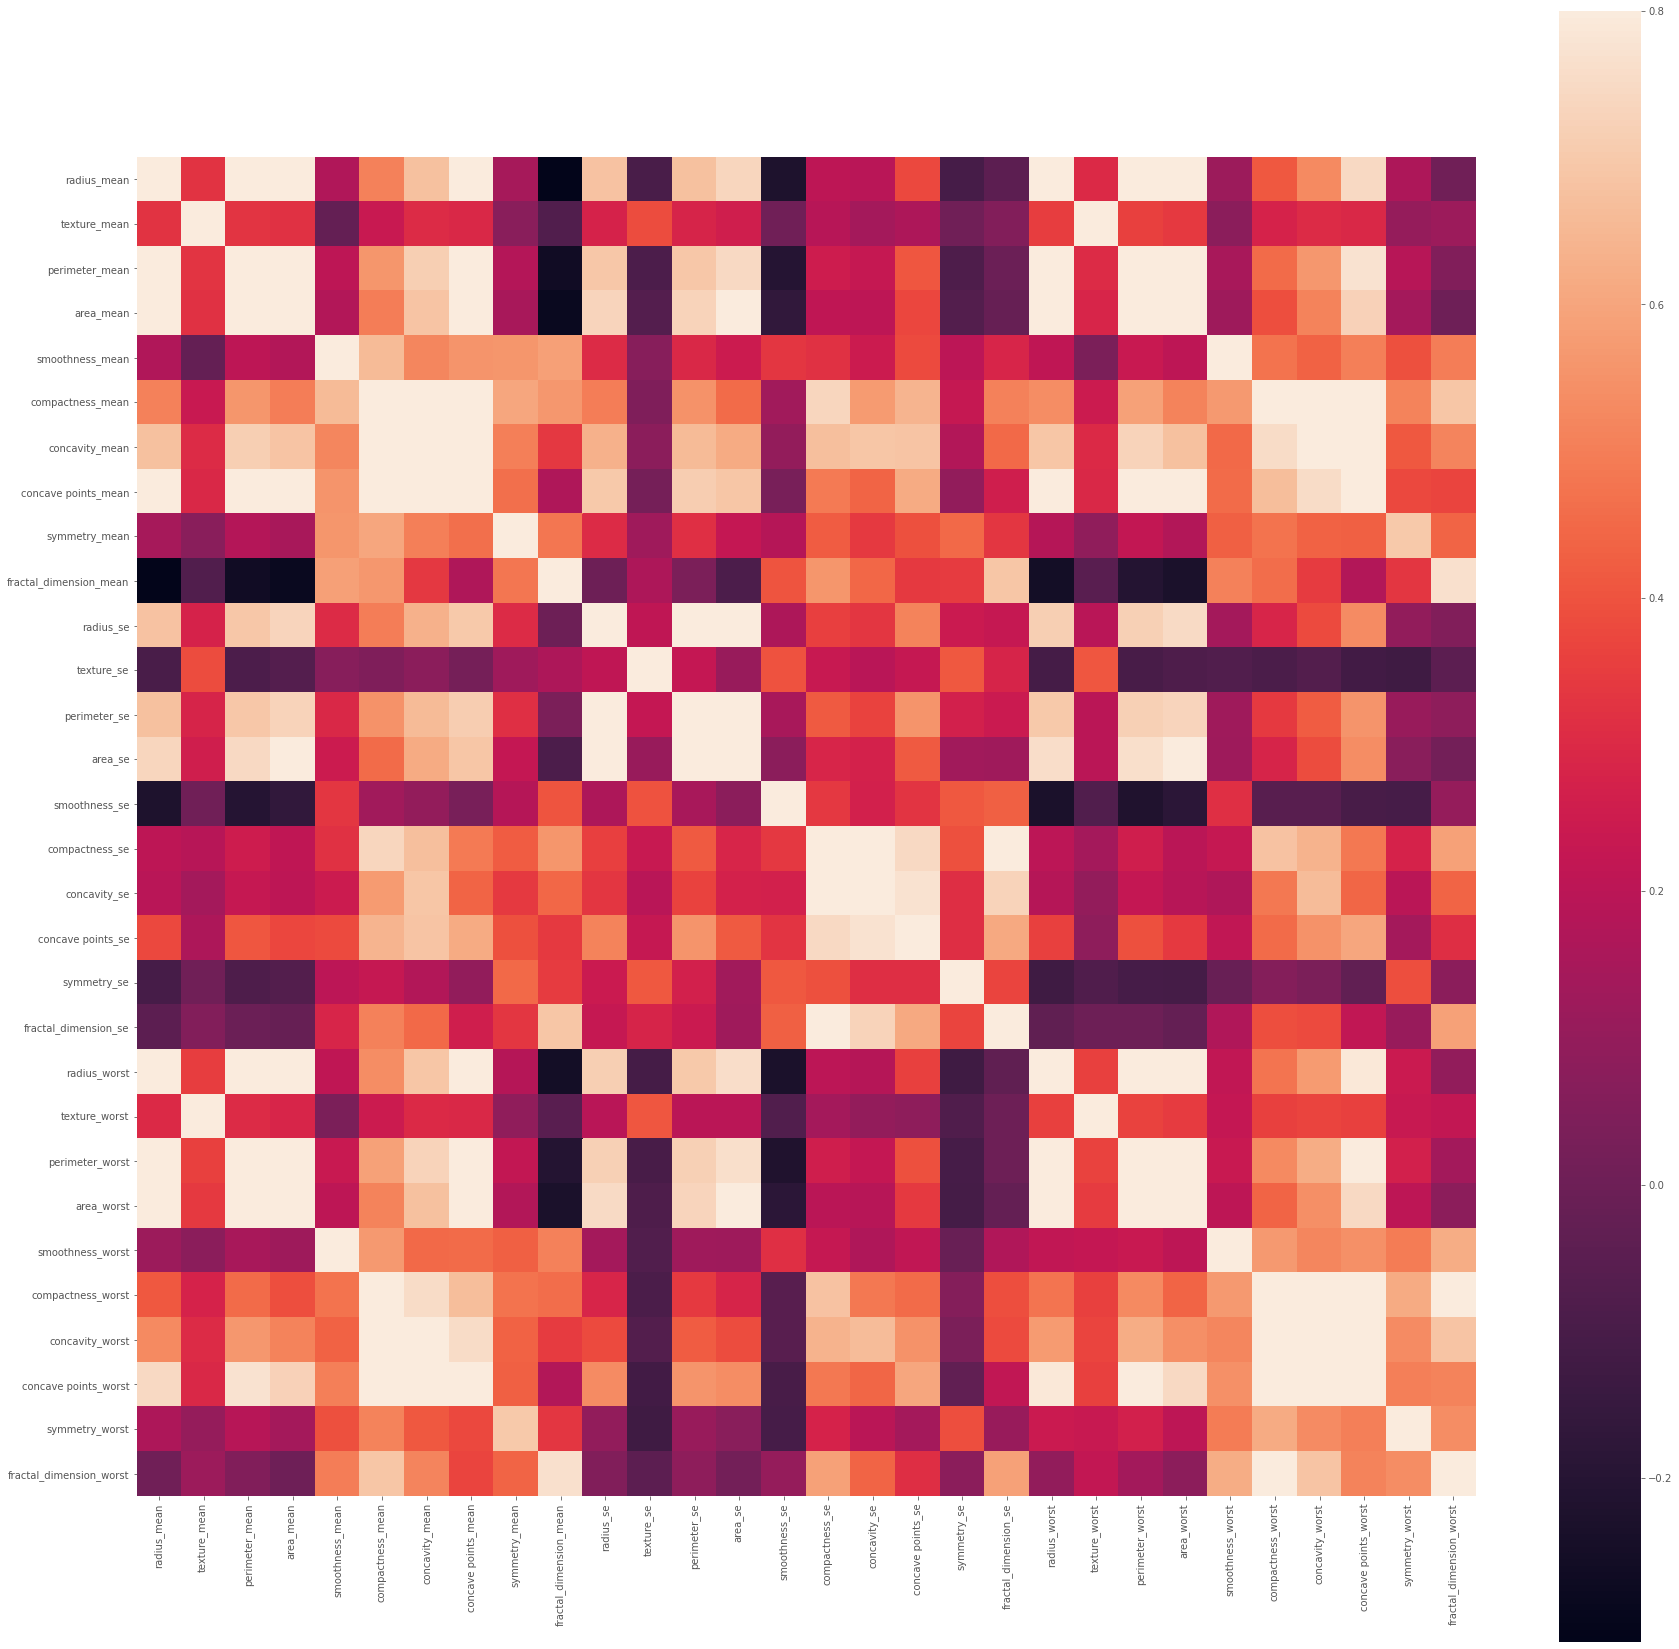

In [85]:
#comaparing the correlation between the features and seeing the heatmap
correlation_matrix = Dataset.iloc[:,1:32].corr()
fig = plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

As we can see from the above heatmap there alot many correlated features we will be using PCA to reduce the number of features to 20

In [102]:
#we will be seperating the target value and the features and preprocessing the data with PCA
X = Dataset.iloc[:,1:31].values
Y = Dataset.iloc[:,0].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Doing PCA
X = PCA(n_components = 20).fit_transform(X)
column = [('component'+str(i)) for i in range(1,21)]
Dataframe = pd.DataFrame(data=X,columns=column)
Dataframe.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,-0.133768,0.345565
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,0.247565,-0.114133
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,0.392626,-0.204532
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,0.026748,-0.464734
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,-0.461436,0.065495


In This project we will be using the RandomForest(RF)  and We use K-Fold estimator and scoring accuray_score to choice the parameter

RandomForest(RF) = Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification 

In [114]:
X_train , X_test , y_train , y_test = train_test_split(X , Y, test_size=0.25, random_state=42)

In [116]:
acc_dict_mean = dict()
for j in range(5,30):
    results = []
    for i in range(10,31):
        cv = KFold(n_splits = i,random_state=1,shuffle=True)
        Model = RandomForestClassifier(n_estimators=j)
        scores = cross_val_score(Model,X_train,y_train,cv=cv,n_jobs=4)
        results.append(np.mean(scores))
    acc_dict_mean[j] = np.array(results) 
Data_acc = pd.DataFrame(acc_dict_mean)
Data_acc.mean()

5     0.910717
6     0.910820
7     0.921361
8     0.921465
9     0.924524
10    0.927105
11    0.928649
12    0.925296
13    0.930800
14    0.934041
15    0.936654
16    0.934402
17    0.938269
18    0.937629
19    0.934217
20    0.936372
21    0.940179
22    0.938027
23    0.938005
24    0.939158
25    0.939193
26    0.941999
27    0.942348
28    0.939367
29    0.941239
dtype: float64

In [125]:
#From the mean expectation we will be choosing n_estimators is the maximum of that
n_estimator = Data_acc.mean().idxmax()
print("The n_estimator is :",n_estimator)
model = RandomForestClassifier(n_estimators=n_estimator)

The n_estimator is : 27


In [137]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc_store = accuracy_score(y_test,y_pred)
print("accuracy score is:",acc_store)
mat = confusion_matrix(y_test,y_pred)
print("The confusin matrix is",mat)

accuracy score is: 0.951048951048951
The confusin matrix is [[49  5]
 [ 2 87]]


Here 49 samples are correctly predicted as malignant and 2 are misclassifier as Benign
Here 87 samples are correctly predicted as  Benign and 5 are misclassifier as malignant